In [1]:
import torch
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import cv2 as cv
import tensorflow as tf

In [2]:
cwd = os.getcwd()

In [3]:
path = os.path.join(cwd, 'part_one_dataset/train_data/1_train_data.tar.pth')

In [4]:
# t = torch.load('1_eval_data.tar.pth')
t = torch.load(path)
print(t.keys()) # it will print data and targets
data, targets = t['data'], t['targets'] # both numpy.ndarray

dict_keys(['data', 'targets'])


/tmp/ipykernel_6410/3331511887.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t = torch.load(path)


In [5]:
model = tf.keras.applications.ConvNeXtTiny()

In [6]:
model.summary()

Model: "convnext_tiny"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_pres… │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stem  │ (None, 56, 56,    │      4,896 │ convnext_tiny_pr… │
│ (Sequential)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │      4,800 │ convnext_tiny_st… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │        192 │ convnext_tiny_st… │
│ (LayerNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │     37,248 │ convnext_tiny_st… │
│ (Dense)             │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │          0 │ convnext_tiny_st… │
│ (Activation)        │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │     36,960 │ convnext_tiny_st… │
│ (Dense)             │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │         96 │ convnext_tiny_st… │
│ (LayerScale)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │          0 │ convnext_tiny_st… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ convnext_tiny_st… │
│                     │ 96)               │            │ convnext_tiny_st… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │      4,800 │ add[0][0]         │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │        192 │ convnext_tiny_st… │
│ (LayerNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │     37,248 │ convnext_tiny_st… │
│ (Dense)             │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │          0 │ convnext_tiny_st… │
│ (Activation)        │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │     36,960 │ convnext_tiny_st… │
│ (Dense)             │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │         96 │ convnext_tiny_st

 Total params: 28,589,128 (109.06 MB)

 Trainable params: 28,589,128 (109.06 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
FE_EMmo = tf.keras.Model(inputs=model.inputs, 
                        outputs=model.layers[-2].output)

In [8]:
FE_EMmo.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_pres… │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stem  │ (None, 56, 56,    │      4,896 │ convnext_tiny_pr… │
│ (Sequential)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │      4,800 │ convnext_tiny_st… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │        192 │ convnext_tiny_st… │
│ (LayerNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │     37,248 │ convnext_tiny_st… │
│ (Dense)             │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │          0 │ convnext_tiny_st… │
│ (Activation)        │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │     36,960 │ convnext_tiny_st… │
│ (Dense)             │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │         96 │ convnext_tiny_st… │
│ (LayerScale)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │          0 │ convnext_tiny_st… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ convnext_tiny_st… │
│                     │ 96)               │            │ convnext_tiny_st… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │      4,800 │ add[0][0]         │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │        192 │ convnext_tiny_st… │
│ (LayerNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │     37,248 │ convnext_tiny_st… │
│ (Dense)             │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │          0 │ convnext_tiny_st… │
│ (Activation)        │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │     36,960 │ convnext_tiny_st… │
│ (Dense)             │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │         96 │ convnext_tiny_st

 Total params: 27,820,128 (106.13 MB)

 Trainable params: 27,820,128 (106.13 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
data224 = []
for i in range(len(data)):
    x = cv.resize(data[i],(224,224))
    data224.append(x)
data224 = np.array(data224)

In [10]:
x_aug2 = FE_EMmo.predict(np.array(data224))

I0000 00:00:1731381236.855402    6516 service.cc:145] XLA service 0x7f1874015ba0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731381236.855424    6516 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
I0000 00:00:1731381237.972908    6592 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot', 100 bytes spill stores, 100 bytes spill loads

I0000 00:00:1731381239.051873    6588 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_12', 164 bytes spill stores, 164 bytes spill loads



 4/79 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step

I0000 00:00:1731381241.605084    6516 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

I0000 00:00:1731381247.587958    6701 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot', 128 bytes spill stores, 128 bytes spill loads

I0000 00:00:1731381248.227102    6694 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_12', 164 bytes spill stores, 164 bytes spill loads



79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step


In [11]:
x_aug2.shape

(2500, 768)

In [12]:
x_aug2 = x_aug2.reshape((2500,-1))

In [13]:
x_aug2.shape

(2500, 768)

In [97]:
tsne = TSNE(n_components=2, perplexity=125,learning_rate=200)
xa1 = tsne.fit_transform(x_aug2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


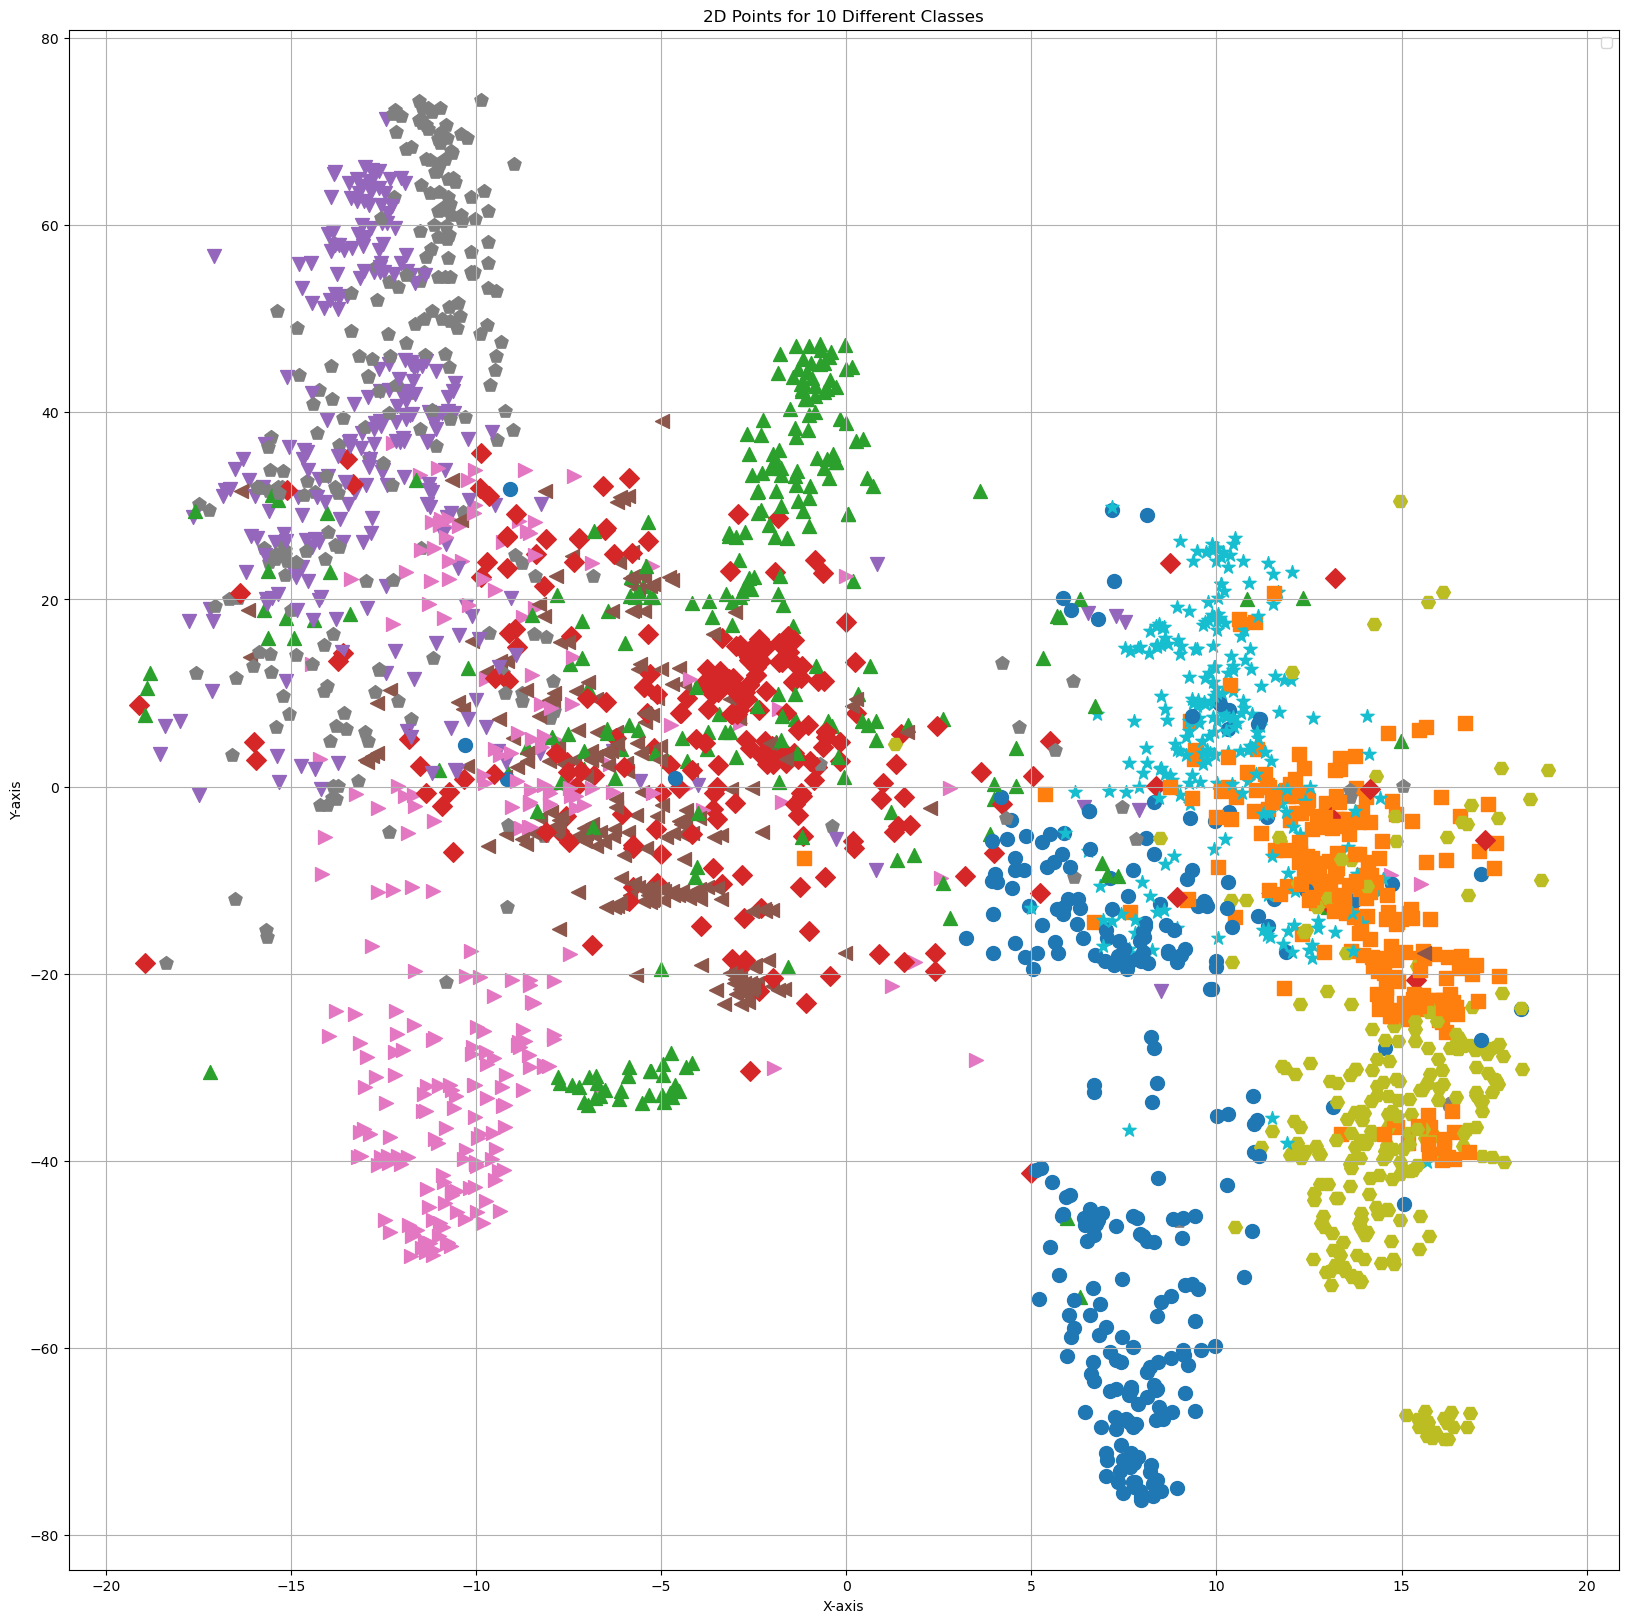

In [113]:
# Number of classes
num_classes = 10

# Generating random data for each class
points_per_class = 20  # Number of points per class
colors = plt.cm.tab10.colors  # Use a colormap for 10 distinct colors
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', 'H', '*']  # 10 different marker shapes

plt.figure(figsize=(20,20))

for i in range(len(xa1[:])):

    # Plot with a unique color and marker for each class
    plt.scatter(xa1[i][0], xa[i][1], color=colors[targets[i]], marker=markers[targets[i]],s = 100)

plt.title('2D Points for 10 Different Classes')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.savefig('asdwdas.png')
plt.show()

In [57]:
x_aug3 = model.predict(data224)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step


In [58]:
tsne = TSNE(n_components=2, perplexity=20, learning_rate=200)
xa2 = tsne.fit_transform(x_aug3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


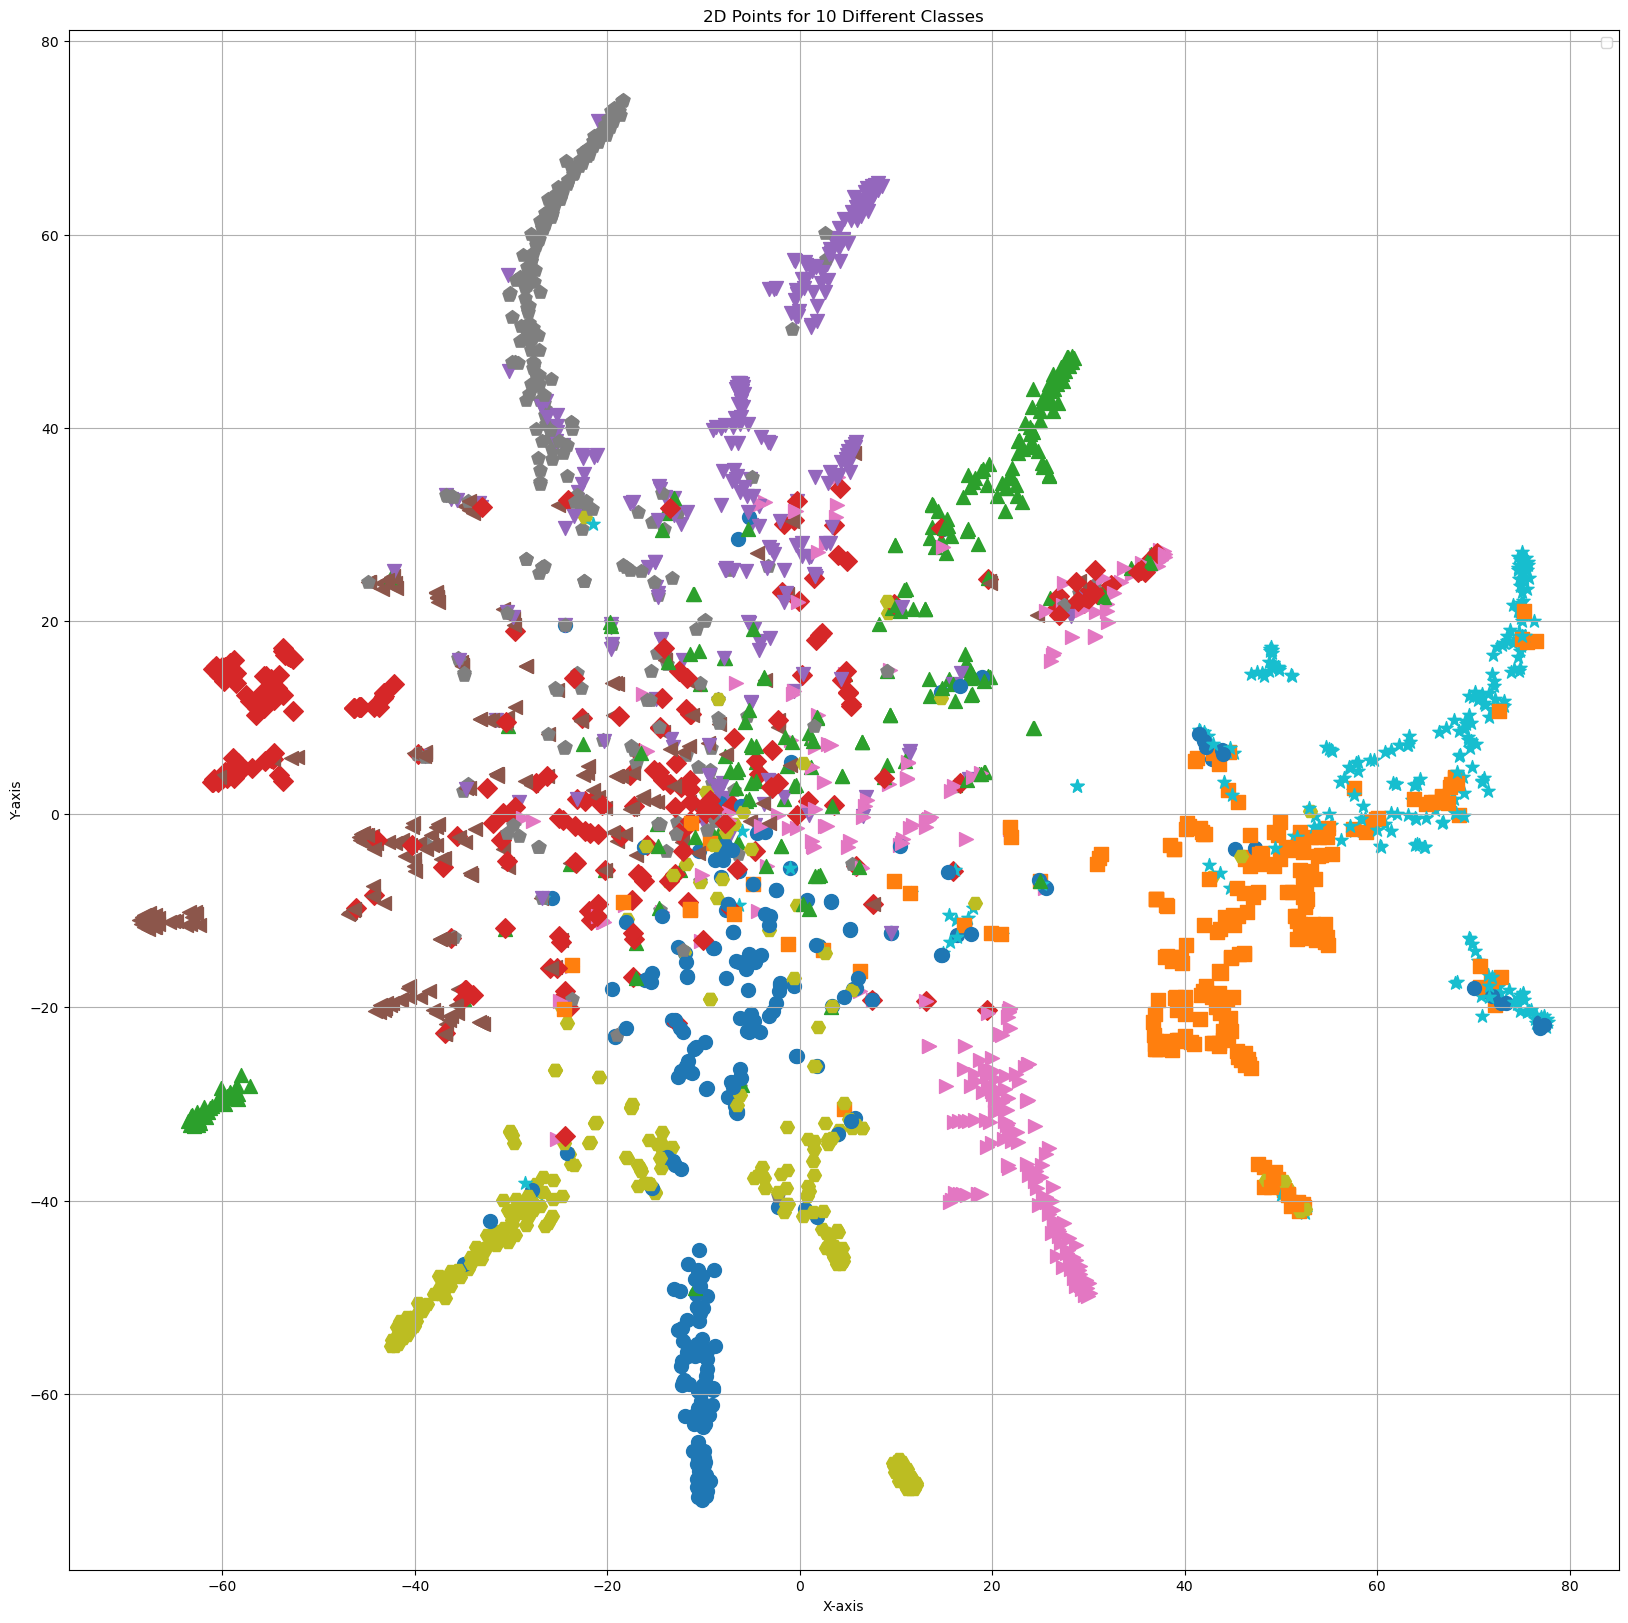

In [99]:
# Number of classes
num_classes = 10

# Generating random data for each class
points_per_class = 20  # Number of points per class
colors = plt.cm.tab10.colors  # Use a colormap for 10 distinct colors
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', 'H', '*']  # 10 different marker shapes

plt.figure(figsize=(20,20))

for i in range(len(xa2[:])):

    # Plot with a unique color and marker for each class
    plt.scatter(xa2[i][0], xa2[i][1], color=colors[targets[i]], marker=markers[targets[i]],s = 100)

plt.title('2D Points for 10 Different Classes')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
x_aug2.shape

(2500, 768)

In [20]:
from LWP import LWP

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_aug2, targets,test_size=0.2,random_state=342354235)

In [23]:
lwp = LWP(numClasses=10,veclen=X_train.shape[1])

In [24]:
lwp.fit(X_train,y_train)

In [25]:
lwp.evaluate(X_train,y_train)

0.8925

In [26]:
lwp.evaluate(X_test,y_test)

0.894

In [177]:
path = os.path.join(cwd, 'part_one_dataset/eval_data/8_eval_data.tar.pth')

In [179]:
# t = torch.load('1_eval_data.tar.pth')
t = torch.load(path)
print(t.keys()) # it will print data and targets
data2,targets2 = t['data'], t['targets'] # both numpy.ndarray

dict_keys(['data', 'targets'])


/tmp/ipykernel_6410/3948806388.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t = torch.load(path)


In [181]:
data2224 = []
for i in range(len(data2)):
    x = cv.resize(data2[i],(224,224))
    data2224.append(x)
data2224 = np.array(data2224)

In [183]:
x_test2 = FE_EMmo.predict(data2224)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step


In [184]:
lwp.evaluate(x_test2,targets2)

0.8836